# Multipal linear regression - Validation testing on trained model

$\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + .....+ \beta_{n}x_n+\epsilon$


**Y** = **X**$\beta$+**E**

Där **X** är modellspecefikations matris. **E** är vektorn med stokastiska fel med avseende på väntevärdet och **Y** är respons vektor för Y över hela stickprovet. 

Our model:

$\mu_{Y|\alpha_1, \alpha_2, \alpha_3} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_1x_2$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "../Data/Advertising.csv"

adv = pd.read_csv(data_path, index_col= 0)

# Split the data set in to training, validation and test data sets
df_test = adv.iloc[:10]
df_train = adv.iloc [10:160]
df_val = adv.iloc[160:]

# Test data set
X_test = np.column_stack([np.ones(10), df_test["TV"], df_test["radio"], df_test["TV"]*df_test["radio"]])
Y_test = df_test["sales"]

# Training data set
X_train = np.column_stack([np.ones(len(df_train)), df_train["TV"], df_train["radio"], df_train["TV"]*df_train["radio"]])
Y_train = df_train["sales"]

# Validation data set
X_val = np.column_stack([np.ones(len(df_val)), df_val["TV"], df_val["radio"], df_val["TV"]*df_val["radio"]])
Y_val = df_val["sales"]

adv.head()
Y = adv["sales"]

X = np.column_stack([np.ones(Y.shape[0]), adv["TV"], adv["radio"], adv["TV"]*adv["radio"]])


$\hat{\beta} = (X^TX)^{-1}X^TY$

SSE = $\frac{1}{n} \sum_{i=1}^{n} [y_i - (b_0 +b_1x_{1i}+...+b_kx_{ki})]^2$

In [74]:
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train

k = len(b)-1
n = Y_train.shape[0]

# Hela mellan vår punkt och sanna medlet
SSE_training_data = np.sum(np.square(Y_train -(X_train @ b)))
var = SSE_training_data / (n-k-1)
S = np.sqrt(var)
Syy_training_data = np.sum(np.square(Y_train)) - (np.square(np.sum(Y_train)))/n
SSR_training_data = Syy_training_data - SSE_training_data

# Validation data
SSE_validation_data = np.sum(np.square(Y_val -(X_val @ b)))
Syy_validation_data = np.sum(np.square(Y_val)) - (np.square(np.sum(Y_val)))/n
SSR_validation_data = Syy_validation_data - SSE_validation_data

# Test data
SSE_test_data = np.sum(np.square(Y_test -(X_test @ b)))
Syy_test_data = np.sum(np.square(Y_test)) - (np.square(np.sum(Y_test)))/n
SSR_test_data = Syy_test_data - SSE_test_data

# Residualen under linjen
# SSR är den delen av felet vi har skapat
# SSR_2 = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)

# SSR, SSR_2

Text(0.5, 1.0, 'Training data')

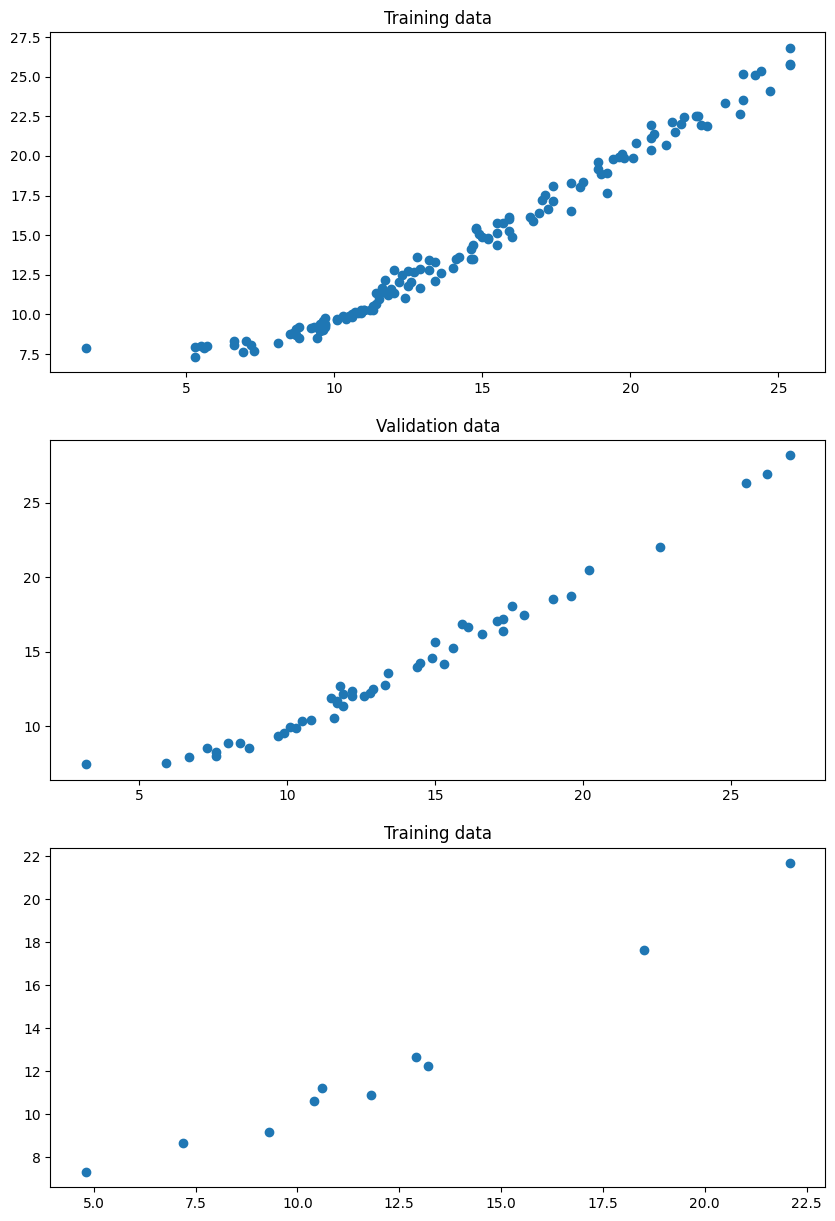

In [83]:
fig, axes = plt.subplots(nrows= 3, figsize= (10, 15))

axes[0].scatter(Y_train, X_train @ b)
axes[0].set_title("Training data")

axes[1].scatter(Y_val, X_val @ b)
axes[1].set_title("Validation data")

axes[2].scatter(Y_test, X_test @ b)
axes[2].set_title("Training data")

In [76]:
b

array([7.10176619e+00, 1.74360582e-02, 1.92242929e-02, 1.13063478e-03])

In [80]:
# Confidence. Så vi kan välja 90% som konfidens grad, vilket sigma vi får. 
Rsq_training_data = SSR_training_data/Syy_training_data
Rsq_validation_data = SSR_validation_data/Syy_validation_data
Rsq_test_data = SSR_test_data/Syy_test_data

print(f"Rsq for training data: {Rsq_training_data}\nRsq for validation data: {Rsq_validation_data}\nRsq for test data: {Rsq_test_data}\n")

Rsq for training data: 0.9671482259699785
Rsq for validation data: 0.9947122077456053
Rsq for test data: 0.9925998014197638



In [81]:
import scipy.stats as stats

# H0: all beta = 0
sig_statistic = (SSR_training_data/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)

p_significance

# We reject the null hypothesis, regression IS significant

np.float64(1.4343704808975987e-99)

Variance/Co-variance matrix:
$c = (X^TX)^{-1}\sigma^2$

In [82]:
# Check if one variabel is significant, ex Radio ads in this case.
# This depends also on if our signification levle is lower the P value. 
# If P value is higer, it is not sigificant to our signification level. 

c = np.linalg.pinv(X_train.T @ X_train) * var

# H0: b3 is irrelevant, beta3 = 0, visar hur sann noll-hypotesen
b3_statistic = b[3] / (S*np.sqrt(c[3, 3]))

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))

p_b3

# Här är slutsatsen visar på att variabeln är noll-hypotesen och då kan vi plocka bort den.
# Den har inget värde i modellen, för den är inte signifikant

np.float64(5.745851095359602e-36)

In [88]:
# På våran okända får vi fram medlet på hur mycket responsen blir i medelvärde
# Detta kan vi säga med säkrheten som RSE visar

RSE_validation_data = np.sqrt((1/(n-2))*SSE_validation_data)
RSE_test_data = np.sqrt((1/(n-2))*SSE_test_data)
RSE_validation_data, RSE_test_data

(np.float64(0.5276125985502519), np.float64(0.29183385844914955))

# Validering och träning 

Mycket viktigt att dela upp data i träning, validering och test data. Så vi kan hitta hur bra våran model är på att vara prediktiv. Hur träffsäker den är på okänd data. Vi letar efter så bra Rsq vi kan få. Vi måste testa på vi får statistisk stöd för hur bra modellen är om vi testar den på validerings data. 